## Handwritten Digit Classification


#### Introduction
In an increasingly technological world, the digitization of handwritten records is a major undertaking. The benefits of having digital records are immense, and as such, we began the monotonous task of transitioning those records by hand long before computers were intelligent enough to recognize letters and numbers from images of handwritten letters.

While some truly illegible handwriting will remain nearly indecipherable by artificially intelligent interpreters, computers can quite easily distinguish individual letters and numbers. This classification is now commonplace in technologies such as Apple Watch's scribble-to-text.

This exercise will carry out basic numeric classification for digits 0-9 using the MNIST dataset available in Python's ScikitLearn library. This exercise follows a tutorial in Packt's advanced machine learning course available at udemy.com.

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

#### Data
The data for this exercise consist of 70,000 images of handwritten digits represented as 784-digit vectors, derived from 28 X 28 pixel images. Each digit in those vectors can take values 0 to 1, 0 meaning no writing exists in that pixel in that image, and 1 meaning dark writing exists in that pixel.

In [2]:
# Read data
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
# Split data into separate objects
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
# Partition data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    shuffle = True,
    random_state = 314
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(52500, 784)
(52500,)
(17500, 784)
(17500,)


#### Example Digit
Below is an example of one of the digits in its original 28 x 28 pixel format. As explained previously, pixels without writing would appear as 0's, and the areas with the darkest writing would appear as 1's.

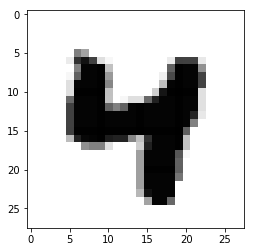

In [5]:
# Print example digit
some_digit = X[25001]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary)

#### Modeling
In predicting digits, we will use two models, a random forest classifier and a support vector machine (SVM). 

The random forest will be fit using Scikit-Learn's default hyperparameters, with the exception of the number of trees, which will be adjusted from the default value of 10 to 100. The n_jobs argument allows the classifier to be fit using all available processors.

In [6]:
# Fit random forest classifier
rf = RandomForestClassifier(n_jobs = -1, n_estimators = 100, random_state = 314)
rf = rf.fit(X_train, y_train)
print("OOB Accuracy: {:.2f}".format(rf.score(X_test, y_test)))

OOB Accuracy: 0.97


In [27]:
# Measure performance
pred_rf = rf.predict(X_test)
confusion = confusion_matrix(y_test, pred_rf, labels = labs)
print("Confusion matrix:\n{}".format(confusion))

/Users/bradensharp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:258: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true

With an out of bag accuracy of 97%, the random forest looks promising. 

The SVM will also initially be fit using Scikit-Learn's default hyperparameters.

In [8]:
# Fit scaled SVM
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = svm.LinearSVC()
svm_model.fit(X_train_scaled, y_train)
print("Train set accuracy: {:.2f}".format(svm_model.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.2f}".format(svm_model.score(X_test_scaled, y_test)))

/Users/bradensharp/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Train set accuracy: 0.92
Test set accuracy: 0.91


In [9]:
# Measure performance
pred_svm = svm_model.predict(X_test_scaled)
confusion = confusion_matrix(y_test, pred_svm)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1659    1   15    1    2   15   15    4   12    2]
 [   0 1910   11    8    2   16    5    1   10    6]
 [  13   26 1544   26   12   10   31   34   37   15]
 [   9   12   43 1580    5   49   10   20   29   28]
 [   8    8    7    6 1574    3    7    4   20   69]
 [  10    8   20   60   13 1364   31    5   41   26]
 [  14   10   11    5   14   25 1626    7    5    2]
 [  10   10   23   12   25    4    0 1650   21   68]
 [  20   39   23   53   15   64   12   14 1441   25]
 [  11    4    9   40   64   13    0   52   21 1526]]


The test-set accuracy for the SVM is still an impressive 91%, but it doesn't quite compete with an untuned random forest. In a classification task such as this, with ten balanced classes, accuracy alone is typically a good enough measure to determine the optimal model, but further investigation wouldn't.

In [26]:
# Classification reports
labs = [str(i) for i in list(range(10))]

rf_class_report = classification_report(y_test, pred_rf, target_names = labs)
svm_class_report = classification_report(y_test, pred_svm, target_names = labs)
print('Random Forest:\n{}'.format(rf_class_report))
print('SVM:\n{}'.format(svm_class_report))

Random Forest:
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1726
          1       0.99      0.99      0.99      1969
          2       0.95      0.97      0.96      1748
          3       0.96      0.95      0.96      1785
          4       0.97      0.98      0.97      1706
          5       0.97      0.97      0.97      1578
          6       0.98      0.98      0.98      1719
          7       0.97      0.96      0.97      1823
          8       0.97      0.95      0.96      1706
          9       0.95      0.95      0.95      1740

avg / total       0.97      0.97      0.97     17500

SVM:
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1726
          1       0.94      0.97      0.96      1969
          2       0.91      0.88      0.89      1748
          3       0.88      0.89      0.88      1785
          4       0.91      0.92      0.92      1706
          5       0.87

#### Conclusion
Across all metrics, the random forest outperforms the SVM. Again, this was to be expected given the balanced classes and previously identified accuracy measures. While further tuning the hyperparameters of the random forest could increase that accuracy, many situational requirements would be satisfied with 97% accuracy.

An additional piece of insight gleaned from this model is the relative difficulty machine learning models have predicting specific digits. Based on these data and these models, 0, 1, and 6 are the easiest numbers to predict, while 8 and 9 are more difficult.